# Simulations

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uuid
from matplotlib.animation import FuncAnimation

## Resolution Configuration

In [2]:
RESOLUTION_4K_WIDTH = 3840
RESOLUTION_4K_HEIGHT = 2160
RESOLUTION_4K = (RESOLUTION_4K_WIDTH, RESOLUTION_4K_HEIGHT)

DOTS_PER_INCH = 200

FIGURE_DIMENSION = (RESOLUTION_4K_WIDTH / DOTS_PER_INCH, RESOLUTION_4K_HEIGHT / DOTS_PER_INCH)

FRAMES_PER_SECOND = 60

TIME_PER_FRAME = 1 / FRAMES_PER_SECOND

## Point Particle Properties

In [3]:
class Particle:
    def __init__(
        self,
        mass: float,
        charge: int,
        x_coordinate: float,
        y_coordinate: float,
        x_velocity: float,
        y_velocity: float):

        # Debugging:
        self.particle_id = uuid.uuid4()

        # Physics Properties:
        self.mass = mass
        self.charge = charge
        self.x_coordinate = x_coordinate
        self.y_coordinate = y_coordinate
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity

        # Particle "History":
        self.x_coordinate_history = [self.x_coordinate,]
        self.y_coordinate_history = [self.y_coordinate,]
        self.x_velocity_history = [self.x_velocity,]
        self.y_velocity_history = [self.y_velocity,]

## Cartesian Coordinates

In [4]:
class CartesianCoordinates:
    def __init__(
        self, 
        maximum_x_value: float, 
        maximum_y_value: float,
        grid_spacing: float = 0.01):
        
        self.grid_spacing = grid_spacing
        self.minimum_x_value = 0.
        self.minimum_y_value = 0.
        self.maximum_x_value = maximum_x_value
        self.maximum_y_value = maximum_y_value

    def round_to_grid(self, number: float) -> float:
        """
        Rounds the given number to the nearest valid position on the grid.

        Args:
        - number (float): The number to round.

        Returns:
        - float: The rounded number.
        """
        return round(number / self.grid_spacing) * self.grid_spacing
    
    def generate_random_valid_starting_position(self) -> float:
        """
        Returns a random, valid starting position on the Cartesian
        coordinate grid.

        Returns:
        - (float, float): The (x, y) coordinates of the particle.
        """
        randomly_generated_x_coordinate = self.maximum_x_value * np.random.random()
        randomly_generated_x_coordinate_rounded = self.round_to_grid(randomly_generated_x_coordinate)

        randomly_generated_y_coordinate = self.maximum_y_value * np.random.random()
        randomly_generated_y_coordinate_rounded = self.round_to_grid(randomly_generated_y_coordinate)

        starting_coordinates = (randomly_generated_x_coordinate_rounded, randomly_generated_y_coordinate_rounded)
        return starting_coordinates 

## Simulation Settings

In [5]:
class Simulation:

    def __init__(
        self,
        total_timesteps: int,
        simulation_granularity: float,
        coordinate_grid: CartesianCoordinates,
        number_of_particles: int,
        verbose: bool = True):

        # Debugging:
        self.verbose = verbose

        # Simulation Settings:
        self.simulation_total_timesteps = total_timesteps
        self.simulation_step_size = simulation_granularity
        self.simulation_current_timestep = 0
        self.simulation_number_of_particles = number_of_particles
        self.simulation_coordinate_grid = coordinate_grid
        self.simulation_list_of_particles = []

        # Simulation Physics:
        self.physics_total_energy_history = []
        self.physics_kinetic_energy_history = []

    def generate_random_participating_particles(
        self,
        verbose: bool = True):

        for particle in range(self.simulation_number_of_particles):
            plus_minus_one = np.random.choice([-1., 1.], p = [0.5, 0.5])
            starting_xy_coordinates = self.simulation_coordinate_grid.generate_random_valid_starting_position()
            starting_xy_velocity = (plus_minus_one * np.random.random(), plus_minus_one * np.random.random())
            
            if verbose:
                print(f"> Particle will start at {starting_xy_coordinates} with velocity {starting_xy_velocity}")

            new_particle = Particle(
                mass = 1.0,
                charge = 0,
                x_coordinate = starting_xy_coordinates[0],
                y_coordinate = starting_xy_coordinates[1],
                x_velocity = starting_xy_velocity[0],
                y_velocity = starting_xy_velocity[1])
            
            self.simulation_list_of_particles.append(new_particle)
            
    def runge_kutta_4_time_evolve(
        self, 
        particle: Particle, 
        current_timestep: int):
        """
        """

        particle_mass = particle.mass
        particle_charge = particle.charge

        old_x_coordinate = particle.x_coordinate_history[current_timestep]
        old_y_coordinate = particle.y_coordinate_history[current_timestep]
        old_x_velocity = particle.x_velocity_history[current_timestep]
        old_y_velocity = particle.y_velocity_history[current_timestep]
        
        # COMPUTE NEW X-POSITION:
        x_position_k1 = old_x_velocity
        x_position_k2 = old_x_velocity + 0.5 * self.simulation_step_size * x_position_k1 
        x_position_k3 = old_x_velocity + 0.5 * self.simulation_step_size * x_position_k2
        x_position_k4 = old_x_velocity + self.simulation_step_size * x_position_k3
        new_x_coordinate = old_x_coordinate + self.simulation_step_size / 6. * (x_position_k1 + 2. * x_position_k2 + 2. * x_position_k3 + x_position_k4)

        # if new_x_coordinate >= self.simulation_coordinate_grid.maximum_x_value:
        #     new_x_coordinate = old_x_coordinate
        # if new_x_coordinate <= self.simulation_coordinate_grid.minimum_x_value:
        #     new_x_coordinate = old_x_coordinate

        # COMPUTE NEW Y-POSITION:
        y_position_k1 = old_y_velocity
        y_position_k2 = old_y_velocity + 0.5 * self.simulation_step_size * y_position_k1 
        y_position_k3 = old_y_velocity + 0.5 * self.simulation_step_size * y_position_k2
        y_position_k4 = old_y_velocity + self.simulation_step_size * y_position_k3
        new_y_coordinate = old_y_coordinate + self.simulation_step_size / 6. * (y_position_k1 + 2. * y_position_k2 + 2. * y_position_k3 + y_position_k4)

        # if new_y_coordinate >= self.simulation_coordinate_grid.maximum_y_value:
        #     new_y_coordinate = old_y_coordinate
        # if new_y_coordinate <= self.simulation_coordinate_grid.minimum_y_value:
        #     new_y_coordinate = old_y_coordinate

        # COMPUTE NEW X-VELOCITY:
        x_velocity_k1 = 0.
        x_velocity_k2 = 0. + 0.
        x_velocity_k3 = 0. + 0.
        x_velocity_k4 = 0. + 0.
        new_x_velocity = old_x_velocity + self.simulation_step_size / 6. * (x_velocity_k1 + 2. * x_velocity_k2 + 2. * x_velocity_k3 + x_velocity_k4)

        # COMPUTE NEW Y-VELOCITY:
        y_velocity_k1 = 0.
        y_velocity_k2 = 0. + 0.
        y_velocity_k3 = 0. + 0.
        y_velocity_k4 = 0. + 0.
        new_y_velocity = old_y_velocity + self.simulation_step_size / 6. * (y_velocity_k1 + 2. * y_velocity_k2 + 2. * y_velocity_k3 + y_velocity_k4)

        if self.verbose:
            print(f"> Evaluated new phase space point: {(new_x_coordinate, new_y_coordinate, new_x_velocity, new_y_velocity)}")

        return (new_x_coordinate, new_y_coordinate, new_x_velocity, new_y_velocity)

    def advance_timestep(self):
        """

        """

        for particle in self.simulation_list_of_particles:

            if self.verbose:
                print(f"> Now RK4 time-evolving Particle {particle.particle_id}")
            
            new_x, new_y, new_v_x, new_v_y = self.runge_kutta_4_time_evolve(particle, self.simulation_current_timestep)

            particle.x_coordinate_history.append(new_x)
            particle.y_coordinate_history.append(new_y)
            particle.x_velocity_history.append(new_v_x)
            particle.y_velocity_history.append(new_v_y)

    def compute_kinetic_energy(self):
        """
        """

        if self.verbose:
            print(f"> Now computing total Kinetic Energy.")

        total_kinetic_energy = 0.

        for particle in self.simulation_list_of_particles:
            particle_velocity_magnitude_squared = particle.x_velocity_history[self.simulation_current_timestep]**2 + particle.y_velocity_history[self.simulation_current_timestep]**2
            particle_kinetic_energy = 0.5 * particle.mass * particle_velocity_magnitude_squared
            total_kinetic_energy = total_kinetic_energy + particle_kinetic_energy
        
        self.physics_kinetic_energy_history.append(total_kinetic_energy)

    def compute_total_energy(self):

        if self.verbose:
            print(f"> Now computing Total Energy.")

        self.physics_total_energy_history.append(self.physics_kinetic_energy_history[self.simulation_current_timestep])

    
    def compute_physics(self):

        self.compute_kinetic_energy()
    
        self.compute_total_energy()


    def initialize_simulation(self):
        self.generate_random_participating_particles()

    
    def run_simulation(self):

        # (1): Initialize the simulation:
        if self.verbose:
            print(f"> Now initializing simulation...")
            
        self.initialize_simulation()

        for timestep in range(self.simulation_total_timesteps):

            if self.verbose:
                print(f"> Now running simulation for timestep #{timestep}.")

            self.advance_timestep()
            self.compute_physics()

            # At the end of the simulation timestep, increment the state:
            self.simulation_current_timestep = self.simulation_current_timestep + 1
                


# Setting Up Simulation

In [6]:
SIMULATION_NUMBER_OF_PARTICLES = 10
SIMULATION_TIMESTEP_GRANULARITY = 1
SIMULATION_TOTAL_TIMESTEPS = 100

SIMULATION_COORDINATE_SYSTEM = CartesianCoordinates(30., 30.)

simulation_instance = Simulation(
    SIMULATION_TOTAL_TIMESTEPS,
    SIMULATION_TIMESTEP_GRANULARITY,
    SIMULATION_COORDINATE_SYSTEM,
    SIMULATION_NUMBER_OF_PARTICLES,
    verbose = True)

simulation_instance.run_simulation()

> Now initializing simulation...
> Particle will start at (17.71, 7.08) with velocity (-0.8170124444369962, -0.4049765664391082)
> Particle will start at (6.3, 15.530000000000001) with velocity (0.910139641460073, 7.337455543132698e-05)
> Particle will start at (23.61, 27.48) with velocity (0.050873708189333344, 0.8659258032204663)
> Particle will start at (29.76, 0.92) with velocity (-0.3560631476758481, -0.33283755237105195)
> Particle will start at (16.11, 9.89) with velocity (0.8412700825387833, 0.7920906916195611)
> Particle will start at (28.03, 0.48) with velocity (0.7823833262180699, 0.6049140453048978)
> Particle will start at (22.1, 19.34) with velocity (0.14455626977826064, 0.3433748666459774)
> Particle will start at (13.82, 22.55) with velocity (-0.672558799885418, -0.3425363165886597)
> Particle will start at (8.94, 24.150000000000002) with velocity (-0.3591465230422265, -0.6943955207841342)
> Particle will start at (9.25, 27.22) with velocity (0.0036972064802262006, 0.93

> Now rendering Frame #0
> Now rendering Frame #0
> Now rendering Frame #1
> Now rendering Frame #2
> Now rendering Frame #3
> Now rendering Frame #4
> Now rendering Frame #5
> Now rendering Frame #6
> Now rendering Frame #7
> Now rendering Frame #8
> Now rendering Frame #9
> Now rendering Frame #10
> Now rendering Frame #11
> Now rendering Frame #12
> Now rendering Frame #13
> Now rendering Frame #14
> Now rendering Frame #15
> Now rendering Frame #16
> Now rendering Frame #17
> Now rendering Frame #18
> Now rendering Frame #19
> Now rendering Frame #20
> Now rendering Frame #21
> Now rendering Frame #22
> Now rendering Frame #23
> Now rendering Frame #24
> Now rendering Frame #25
> Now rendering Frame #26
> Now rendering Frame #27
> Now rendering Frame #28
> Now rendering Frame #29
> Now rendering Frame #30
> Now rendering Frame #31
> Now rendering Frame #32
> Now rendering Frame #33
> Now rendering Frame #34
> Now rendering Frame #35
> Now rendering Frame #36
> Now rendering Frame #

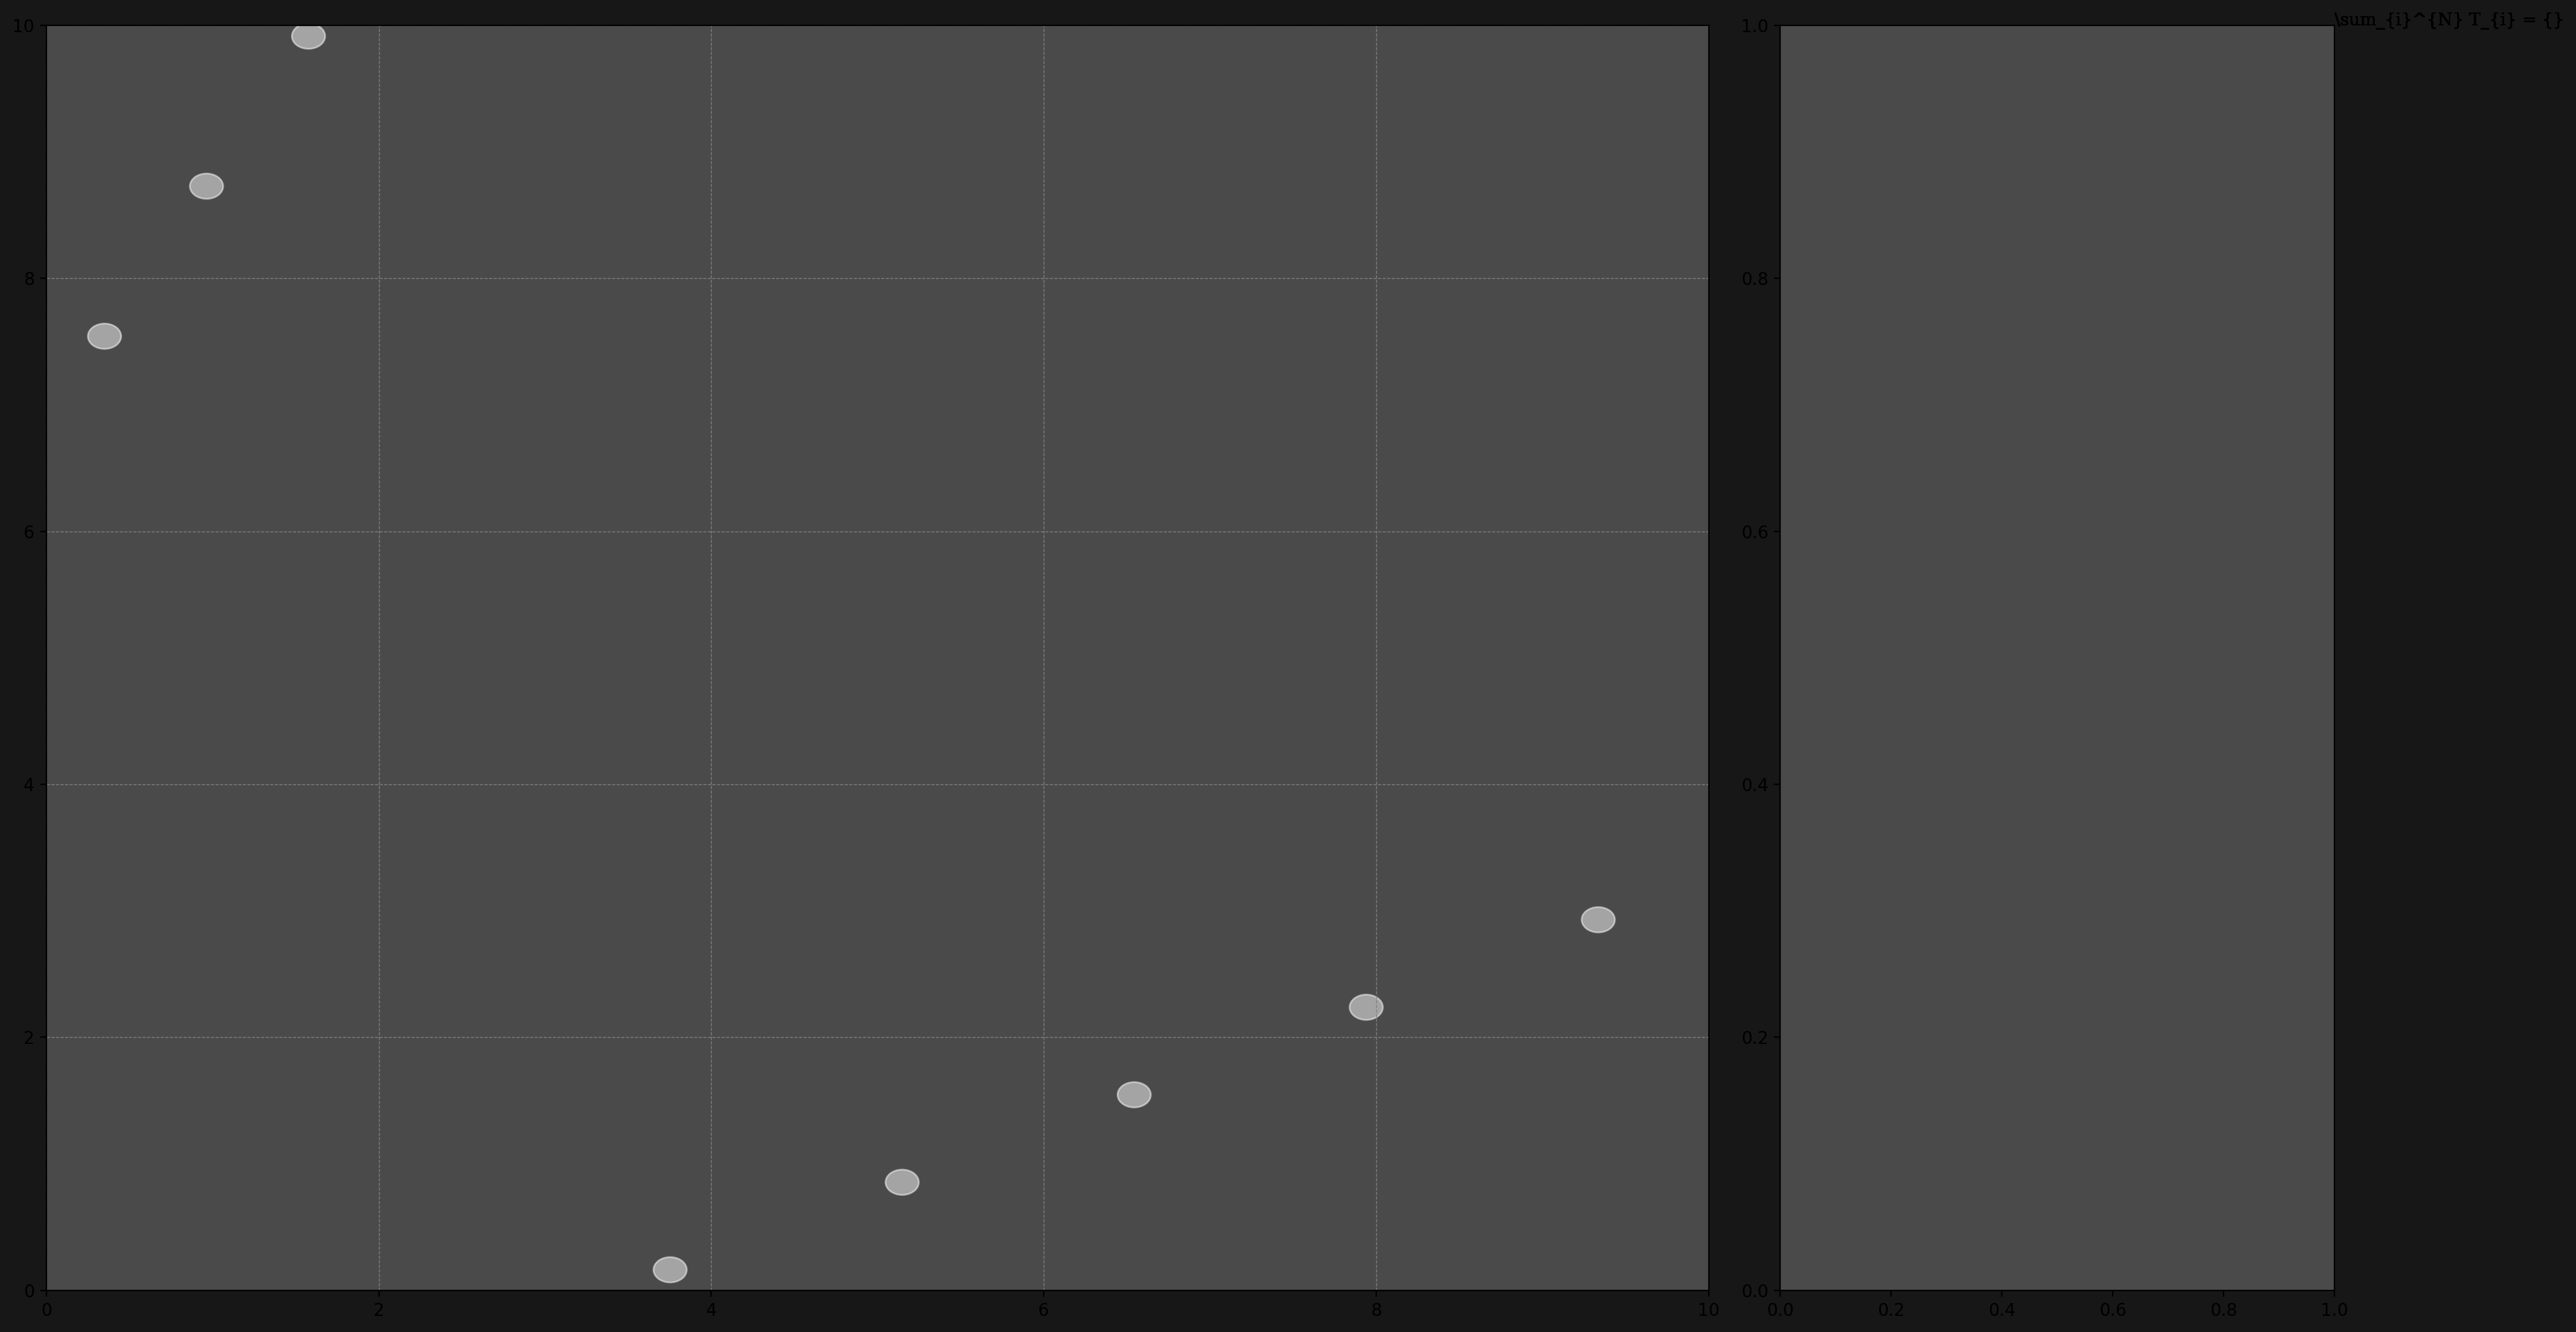

In [7]:
HEXCOLOR_FIGURE_BACKGROUND = "#171717"
HEXCOLOR_SIMULATION_BACKGROUND = "#4a4a4a"
HEXCOLOR_DIAGNOSTIC_BACKGROUND = "#4a4a4a"

SIMULATION_TIME_BETWEEN_FRAMES_IN_MILLISECONDS = 1

# (1): Initialize the Figure:
figure_object, (simulation_axes, diagnostic_axes) = plt.subplots(
    1, 
    2, 
    figsize = FIGURE_DIMENSION,
    dpi = DOTS_PER_INCH,
    gridspec_kw = {'width_ratios': [3, 1]},
    facecolor = HEXCOLOR_FIGURE_BACKGROUND)

# Always update rcParams:
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["font.family"] = "serif"

plt.rcParams["mathtext.fontset"] = "cm" # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True    

# Set y axis
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

plt.tight_layout()

def initialize_plot():

    simulation_axes.set_facecolor(HEXCOLOR_SIMULATION_BACKGROUND)
    diagnostic_axes.set_facecolor(HEXCOLOR_DIAGNOSTIC_BACKGROUND)

    simulation_axes.set_xlim(0, 10)
    simulation_axes.set_ylim(0, 10)

    # Add faint grid to simulation_axes
    simulation_axes.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    list_of_particles = []

    for particle in simulation_instance.simulation_list_of_particles:
        particle_starting_x_position = particle.x_coordinate_history[0]
        particle_starting_y_position = particle.y_coordinate_history[0]
        circle = plt.Circle(
            (particle_starting_x_position, particle_starting_y_position),
            radius = 0.1,
            color = "white",
            alpha = 0.5)
        simulation_axes.add_patch(circle)
        list_of_particles.append(circle)
    
    # Must return the elements (Artists) that will be updated in the animation
    return list_of_particles

def modify_figure_data(frame):
    print(f"> Now rendering Frame #{frame}")

    list_of_particles = initialize_plot()

    for particle_index, circle in enumerate(list_of_particles):
        circle.set_center((simulation_instance.simulation_list_of_particles[particle_index].x_coordinate_history[frame], simulation_instance.simulation_list_of_particles[particle_index].y_coordinate_history[frame]))

    # List calculated "physics quantities" on the diagnostic_axes:
    diagnostic_axes.annotate(
        r"\sum_{i}^{N} T_{i} = {}",
        (1.,1.,),
        (1.,1.,)
    ) 

    # Must return the updated elements
    return list_of_particles

# (2): Define the FuncAnimation
animation = FuncAnimation(
    fig = figure_object,
    func = modify_figure_data,
    frames = SIMULATION_TOTAL_TIMESTEPS,
    interval = SIMULATION_TIME_BETWEEN_FRAMES_IN_MILLISECONDS)

SIMULATION_NAME = "simulations"
animation.save(filename = f"{SIMULATION_NAME}_v5.gif", writer = "pillow")

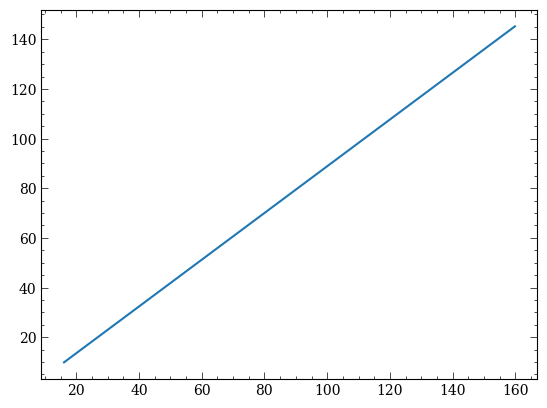

In [8]:
plt.plot(simulation_instance.simulation_list_of_particles[4].x_coordinate_history, simulation_instance.simulation_list_of_particles[4].y_coordinate_history)

In [9]:
simulation_instance.simulation_list_of_particles[4].x_coordinate_history

[16.11,
 17.54716972433709,
 18.984339448674177,
 20.421509173011266,
 21.858678897348355,
 23.295848621685444,
 24.733018346022533,
 26.17018807035962,
 27.60735779469671,
 29.0445275190338,
 30.48169724337089,
 31.918866967707977,
 33.356036692045066,
 34.793206416382155,
 36.230376140719244,
 37.66754586505633,
 39.10471558939342,
 40.54188531373051,
 41.9790550380676,
 43.41622476240469,
 44.85339448674178,
 46.290564211078866,
 47.727733935415955,
 49.164903659753044,
 50.60207338409013,
 52.03924310842722,
 53.47641283276431,
 54.9135825571014,
 56.35075228143849,
 57.78792200577558,
 59.225091730112666,
 60.662261454449755,
 62.099431178786844,
 63.53660090312393,
 64.97377062746102,
 66.4109403517981,
 67.84811007613519,
 69.28527980047227,
 70.72244952480935,
 72.15961924914643,
 73.59678897348351,
 75.0339586978206,
 76.47112842215768,
 77.90829814649476,
 79.34546787083184,
 80.78263759516892,
 82.219807319506,
 83.65697704384309,
 85.09414676818017,
 86.53131649251725,
 87.